In [43]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from models import CNN

In [44]:
# The data, split between train and test sets:
(X_train, y_train), (X, y) = cifar10.load_data()
print(X.shape)
print(y.shape)
print(np.min(X), np.max(X))

(10000, 32, 32, 3)
(10000, 1)
0 255


In [45]:
encoder = CNN(X.shape[1:])
_ = encoder(np.random.rand(1,32,32,3).astype(np.float32), head='f')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline

In [5]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto').fit(np.reshape(X_train,(X_train.shape[0], -1)), y_train.squeeze())

/home/thallessilva/anaconda3/envs/tf2.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [6]:
print("Train score:", clf.score(np.reshape(X_train,(X_train.shape[0], -1)), y_train),
      "Test score:", clf.score(np.reshape(X_test,(X_test.shape[0], -1)), y_test))

Train score: 0.4815 Test score: 0.388


## Self-Supervised pre-training

In [50]:
X_train_repr, _ = encoder(tf.cast(X_train, tf.float32) / 255, head='f', training=True)
X_test_repr, _ = encoder(tf.cast(X_test, tf.float32) / 255, head='f', training=True)
print(X_train_repr.shape)
print(X_test_repr.shape)

(8000, 64)
(2000, 64)


In [51]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto').fit(X_train_repr, y_train.squeeze())

/home/thallessilva/anaconda3/envs/tf2.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [52]:
print(clf.score(X_train_repr, y_train.squeeze()), clf.score(X_test_repr, y_test.squeeze()))
# 0.3755

0.36825 0.334


In [53]:
X_train_repr[0]

<tf.Tensor: shape=(64,), dtype=float32, numpy=
array([1.4345019 , 0.9479765 , 1.031179  , 1.1265006 , 1.0575852 ,
       1.2833749 , 1.0068806 , 1.1436627 , 0.8638181 , 1.087645  ,
       0.8988261 , 1.0996872 , 0.6563535 , 0.6036526 , 0.9003408 ,
       0.7250682 , 1.1738721 , 0.85018444, 0.6500663 , 0.78287464,
       0.819268  , 1.7437247 , 0.69539636, 0.39964586, 1.2351049 ,
       0.7544596 , 1.068433  , 0.78548145, 1.1780468 , 0.7318143 ,
       1.0040369 , 1.6381004 , 0.88464075, 1.0014634 , 1.3250813 ,
       1.252008  , 0.5859614 , 0.97549677, 0.67451763, 0.5935444 ,
       0.86094284, 1.7463434 , 0.6409968 , 0.9102959 , 0.67559314,
       0.58983535, 1.625846  , 1.090554  , 0.9042509 , 0.43855608,
       0.7684854 , 1.3378581 , 1.3805388 , 1.6071941 , 0.7532274 ,
       0.9251851 , 0.5050979 , 1.1226472 , 0.44601113, 1.1929951 ,
       0.7432823 , 0.94509083, 1.2071098 , 0.94144225], dtype=float32)>

In [54]:
X_test_repr[0]

<tf.Tensor: shape=(64,), dtype=float32, numpy=
array([1.163074  , 0.3929186 , 0.8468636 , 0.9747061 , 1.0373178 ,
       0.42367733, 0.7278984 , 0.43993396, 0.95941436, 0.49452153,
       1.0536957 , 0.86911094, 1.3979626 , 0.5592682 , 0.45195234,
       1.0721087 , 0.7322221 , 0.8395248 , 0.5836114 , 0.90972924,
       0.37710944, 0.893841  , 1.0455859 , 0.49756956, 0.87728655,
       0.9519247 , 0.73863816, 1.3595743 , 0.37984008, 0.917101  ,
       1.177542  , 0.9841347 , 0.8329063 , 0.63866127, 0.24640732,
       0.75444293, 0.72150624, 0.8277275 , 0.38161442, 0.85956013,
       0.09088154, 0.73261434, 0.7871045 , 0.45621416, 1.0522455 ,
       0.49588618, 0.8464479 , 0.5313008 , 0.54037523, 1.1193264 ,
       1.0375642 , 0.7498039 , 0.52152395, 1.0487715 , 0.8318695 ,
       0.9244063 , 0.47892818, 0.22218975, 0.5456107 , 1.05145   ,
       1.20453   , 0.90938157, 0.65117776, 0.35398453], dtype=float32)>

In [12]:
cosine_loss = tf.keras.losses.CosineSimilarity(axis=1)
loss = cosine_loss([[0.0001, 1], [1., 1]], [[0.0002, 1], [0., 1]])

print('Loss: ', loss.numpy())  # Loss: 0.5

Loss:  -0.8535534


In [13]:
a = tf.convert_to_tensor([1,6,5], dtype=tf.int32)
b = tf.convert_to_tensor([4,3,2], dtype=tf.int32)
res = tf.sets.intersection(a[None,:],b[None,:])
print(tf.size(res))

tf.Tensor(0, shape=(), dtype=int32)


In [14]:
a = np.array([28.171087, 30.802778], dtype=np.float32)
b = np.array([2.2323670e-06, 2.1488113e-06], dtype=np.float32)

print(a / (a+b))

[0.99999994 0.99999994]


In [15]:
samples = tf.random.categorical(tf.math.log([[0.5, 0.5]]), 5)
samples

<tf.Tensor: shape=(1, 5), dtype=int64, numpy=array([[1, 0, 1, 0, 1]])>

In [16]:
shape = (10,8)

positive_indices = tf.constant([[1], [4]])
positive_indices_mask = tf.zeros_like(positive_indices.shape)

mask = tf.ones([shape[0]], dtype=tf.int32)
mask = tf.tensor_scatter_nd_update(mask, positive_indices, positive_indices_mask)
print(mask)

tf.Tensor([1 0 1 1 0 1 1 1 1 1], shape=(10,), dtype=int32)


In [17]:
p = tf.ones(shape[0])
p = p * tf.cast(mask, tf.float32)
p = p / tf.reduce_sum(p)
print(p)

candidate_negative_indices = tf.random.categorical(tf.math.log(tf.reshape(p, (1,-1))), 5000) # note log-prob
print(candidate_negative_indices)

tf.Tensor([0.125 0.    0.125 0.125 0.    0.125 0.125 0.125 0.125 0.125], shape=(10,), dtype=float32)
tf.Tensor([[0 6 7 ... 2 6 7]], shape=(1, 5000), dtype=int64)


(array([676.,   0., 598., 625.,   0., 614., 618., 600., 681., 588.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

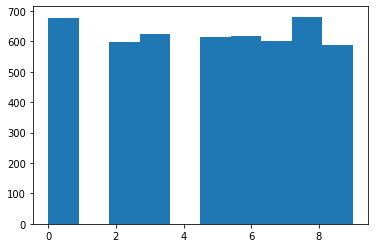

In [18]:
plt.hist(candidate_negative_indices)

In [19]:
# positive_indices = tf.constant([1,2], dtype=tf.int32)
# a = 

indices = tf.constant([[4], [3], [1], [7]])
updates = tf.constant([0, 0, 0, 0])

tensor = tf.ones([8], dtype=tf.int32)
mask = tf.tensor_scatter_nd_update(tensor, indices, updates)
print(updated)

NameError: name 'updated' is not defined

In [ ]:
indices = tf.constant([[4], [3], [1], [7]])
updates = tf.constant([9, 10, 11, 12])
tensor = tf.ones([12], dtype=tf.int32)
updated = tf.tensor_scatter_nd_add(tensor, indices, updates)
print(updated)

In [20]:
import tensorflow as tf

In [21]:
BS=2
N_NEG=3
N_DIM=4

In [22]:
vi = tf.ones((BS, N_DIM))

a = tf.ones([BS,N_NEG,N_DIM])
negatives = tf.random.uniform([BS,N_NEG,N_DIM])
negatives

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[0.12642372, 0.86281705, 0.18977296, 0.64400244],
        [0.4894439 , 0.00287366, 0.8316258 , 0.41707337],
        [0.46185935, 0.67044675, 0.714906  , 0.87362814]],

       [[0.34904468, 0.73694515, 0.02537   , 0.54320323],
        [0.84959733, 0.71772206, 0.78677046, 0.6683798 ],
        [0.4723971 , 0.58122766, 0.878623  , 0.18785727]]], dtype=float32)>

In [23]:
cosine_similarity = tf.keras.losses.CosineSimilarity(reduction=tf.losses.Reduction.NONE, axis=-1)

In [24]:
negatives

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[0.12642372, 0.86281705, 0.18977296, 0.64400244],
        [0.4894439 , 0.00287366, 0.8316258 , 0.41707337],
        [0.46185935, 0.67044675, 0.714906  , 0.87362814]],

       [[0.34904468, 0.73694515, 0.02537   , 0.54320323],
        [0.84959733, 0.71772206, 0.78677046, 0.6683798 ],
        [0.4723971 , 0.58122766, 0.878623  , 0.18785727]]], dtype=float32)>

In [40]:
similatiry = []
for vi_prime in tf.transpose(negatives, (1,0,2)):
    vi_prime = tf.expand_dims(vi_prime, axis=1)
    
    negatives_ = tf.expand_dims(tf.reshape(negatives, (-1,N_DIM)), axis=0)
    
    print(vi_prime)
    print("---------------")
    print(negatives_)
    print("---------------")
    s = cosine_similarity(vi_prime, negatives_)
    similatiry.append(s)
    print(s)
    s = tf.reduce_sum(s, axis=1)
    print(s)
    print("---------------")
    break

tf.Tensor(
[[[0.12642372 0.86281705 0.18977296 0.64400244]]

 [[0.34904468 0.73694515 0.02537    0.54320323]]], shape=(2, 1, 4), dtype=float32)
---------------
tf.Tensor(
[[[0.12642372 0.86281705 0.18977296 0.64400244]
  [0.4894439  0.00287366 0.8316258  0.41707337]
  [0.46185935 0.67044675 0.714906   0.87362814]
  [0.34904468 0.73694515 0.02537    0.54320323]
  [0.84959733 0.71772206 0.78677046 0.6683798 ]
  [0.4723971  0.58122766 0.878623   0.18785727]]], shape=(1, 6, 4), dtype=float32)
---------------
tf.Tensor(
[[-1.0000002  -0.4242004  -0.8716562  -0.9591664  -0.78227496 -0.65945494]
 [-0.9591664  -0.40822196 -0.84154755 -1.         -0.81254864 -0.6258837 ]], shape=(2, 6), dtype=float32)
tf.Tensor([-4.696753 -4.647368], shape=(2,), dtype=float32)
---------------


In [26]:
res = cosine_similarity(negatives, negatives)

In [42]:
cosine_similarity([0.34904468, 0.73694515, 0.02537,    0.54320323], 
                  [0.4723971,  0.58122766, 0.878623,   0.18785727])

<tf.Tensor: shape=(), dtype=float32, numpy=-0.6258837>

## MAPFN

In [ ]:
print(negatives.shape)

@tf.function
def func(vi_prime):
    vi_prime = tf.expand_dims(vi_prime, axis=1)
    similarity = cosine_similarity(vi_prime, negatives)
    return similarity


squares = tf.map_fn(func, tf.transpose(negatives, (1,0,2)), parallel_iterations=BS)

## UNPACK

In [ ]:
tf.unstack(tf.transpose(negatives, (1,0,2)))